# Big Data Computing 2024 - Homework 2 - Deadline: December 22$^{nd}$, 11.59pm

# Instructions for the homework
  > Follow the instructions in the notebook carefully



## General instructions
  * Do NOT remove ANYTHING that is already in the notebook.
  * Before you start, show the line number for the code cells:
    * Go to Tools -> Settings -> Editor -> show line numbers
  * The group in the second Homework **MUST BE EXACTLY THE SAME** as in Homework 1
  * The software must be commented.
  * About this notebook:
    * Create a personal copy to be able to modify it: File > Save a copy in Drive
    * Rename the copied notebook `BDC2024-HW2.ipynb`


## Instructions for **code**:
  * DO NOT add code cells
  * DO NOT remove any code cells
  * Only edit the code cells containing the comment `#YOUR CODE STARTS HERE#`. Within those cells:
    * DO NOT remove ANYTHING that we have written (otherwise specified).
    * Add your code between line `#YOUR CODE STARTS HERE#` and line `#YOUR CODE ENDS HERE#`; **DO NOT REMOVE THESE COMMENTS**

> Ensure that the notebook can be faithfully reproduced by anyone (hint: pseudo random number generation).

> **If you need to set a random seed, set it to `1224`.**

[comment]: <> (#REMOVE_CELL#)


## Instructions for **text**:
* DO NOT add text cells
* DO NOT remove text cells
* DO NOT modify the text cells we have created.
* Only edit text cells starting with the comment ------------YOUR TEXT STARTS HERE------------. Within those cells:
  * Do NOT remove anything we have entered.
  * **Add your own text after the line ------------YOUR TEXT STARTS HERE------------; DO NOT REMOVE THIS TEXT**
  * For each cell, a specific delivery will be given. If you are given a maximum number of sentences to write, both the dot "." and the semicolon ";" will be considered sentence dividers.

[comment]: <> (#REMOVE_CELL#)


## *Evaluation*

The homework will be evaluated based on the following criteria:

1. **Code Quality**: correctness, readability (length, comments, unnecessary repetitions)
2. **Quality of Textual Responses**: correctness, clarity, etc.
3. **Quality of Produced Visualizations** (tables/figures/etc.): correctness, clarity, etc.
4. **Quality**, **quantity** and **diversity** of experiments conducted, **results** achieved, etc. \[if applicable; will be clearly indicated\]
5. **Timely Submission**: late submissions will result in significant point deductions
6. **Plagiarism**: copying code/text from colleagues or online sources will result in significant point deductions \[it will be clearly indicated if borrowing code from other sources is allowed\]

*You are expected to work in a principled way, being aware of what you are doing and why*

[comment]: <> (#REMOVE_CELL#)

## Group Composition
Write down the list of group members. The format should be Last Name, First Name, Student ID. Group members should be sorted alphabetically by surname and placed on different lines.
Example:

Becchetti, Luca, 123456

Siciliano, Federico, 987654

**Remember:** your group in the second homework must be the same as in the first one.

Ercoli, Fabio Massimo, 802397

Mai Mihai, Cristian Andrei, 1942925



## Submission (read carefully)

1. This notebook is one of two parts of a Google Classroom assignment, hence it should be delivered using Google Classroom. Your delivery for Homework 2 will thus consist of two files (like for Homework 1): i) this notebook; ii) a pdf with your answers to the theoretical assignments.
2. Each notebook should be delivered *only once*, by the student whose last name comes first in alphabetical order in your group. So for example, if the group consists of Luca Becchetti and Federico Siciliano, Luca Becchetti (and *he only*) will deliver the homework (Federico Siciliano might well pay attention that Luca Becchetti actually does so within the mandatory deadline :-))
3. You can upload multiple files as part of the same assignment in Google Classroom. Please be sure that you only press the Classroom's "hand in" button ("Consegna" in Italian) after you have uploaded the final versions of this notebook and of the pdf containing your answers to the theoretical questions.

## Homework 2 (notebook)
We want to perform topic distillation/[keyword extraction](https://en.wikipedia.org/wiki/Keyword_extraction) using the techniques seen in class, in particular: 1) $k$-means preceeded by dimensionality reduction techniques and 2) SVD or PCA alone, as seen in class. You will use the [20 newsgroups dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html), in particular the ```['comp.graphics', 'rec.motorcycles', 'rec.sport.baseball', 'sci.space', 'talk.religion.misc']```categories.

##Software and dataset
Use the cell below to import **ALL** Python packages that you need for this homework.

Add them in this cell as you proceed with the implementation


In [1]:
#REMOVE_OUTPUT#
!pip install --upgrade --no-cache-dir gdown
#YOUR CODE STARTS HERE#
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from time import time
from wordcloud import WordCloud
#YOUR CODE ENDS HERE#
#THIS IS LINE 15#

Next, download the dataset as specified earlier

In [2]:
#YOUR CODE STARTS HERE#
categories = ['comp.graphics', 'rec.motorcycles', 'rec.sport.baseball', 'sci.space', 'talk.religion.misc']
dataset = fetch_20newsgroups(remove=("headers", "footers", "quotes"),
  subset="all", categories=categories, shuffle=False, random_state=1224)
labels = dataset.target # true labels of the documents
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0] # number of different labels
print(f"{len(dataset.data)} documents - {true_k} categories: {category_sizes}")
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

4578 documents - 5 categories: [973 996 994 987 628]


## Part 1 - keyword extraction/topic distillation using $k$-means
As a baseline, cluster documents using standard $k$-means. The number of clusters will be equal to the number of categories you downloaded. Quality will be measured as follows:
- Soundness of identified keywords: build word clouds of 20 most important keywords for each cluster
- Time efficiency
- Clustering quality with respect to true labels: [Adjusted Rand Index](https://en.wikipedia.org/wiki/Rand_index) (see scikit-learn documentation about)

This part must run within a maximum of **15** minutes. To meet this constraint, approximations can be made (using fewer documents, reducing dictionary size). However, these approximations **must be explicitly indicated** in the code.

### 1.1
If you need to, prepare here helper functions to run your computations.

In [3]:
#YOUR CODE STARTS HERE#
# Helper function to show the top 20 keywords for centroid.
# Each centroid represent its cluster.
def showCentroids(km: KMeans, true_k: int, terms: np.array):
    data = pd.DataFrame(km.cluster_centers_, columns=terms)
    for i in range(true_k):
        positives: pd.Series = data.iloc[i].sort_values(ascending=False).head(20)
        print("Cluster", i, ":", *list(positives.axes[0]))
        WordCloudImage(positives).show()

# Helper class to show the cloud words
class WordCloudImage:
    def __init__(self, series: pd.Series):
        self.frequences = {}
        words = list(series.axes[0])
        n = len(words)
        for i in range(n):
            word = words[i]
            freq = series.iloc[i] # We use the value of the keyword as frequency
            self.frequences[word] = freq
    def show(self):
        wc = WordCloud(background_color="white", max_words=20)
        wc.generate_from_frequencies(self.frequences)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()

class TextVectorizer:
    def __init__(self, dataset, max_df, min_df):
        # We tried some other text-preprossing (for instance lemmatization),
        # but this does not improve the adjusted random scores (according to our tests!)
        vectorizer = TfidfVectorizer(
            max_df=max_df, # ignoring terms that appear in more than max_df% of the documents
            min_df=min_df,   # ignoring terms that are not present in at least min_df documents
            stop_words="english"
        )
        self.X_tfidf = vectorizer.fit_transform(dataset.data)
        self.terms: np.array = vectorizer.get_feature_names_out()
#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

###1.2
Text pre-processing and vectorization goes here

In [4]:
#YOUR CODE STARTS HERE#
vectorizer = TextVectorizer(dataset, 0.5, 5)
X_tfidf = vectorizer.X_tfidf
terms: np.array = vectorizer.terms # In this colab term and keyword are synonymous
print(f"documents: {X_tfidf.shape[0]}, terms: {X_tfidf.shape[1]} {terms.shape} {terms}")
print(f"the table is very sparse. Only around the {X_tfidf.nnz * 100 / np.prod(X_tfidf.shape):.3f}% of the cells are non zeros.")












#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

documents: 4578, terms: 8834 (8834,) ['00' '000' '0000' ... 'zooming' 'zx' 'zyxel']
the table is very sparse. Only around the 0.542% of the cells are non zeros.


### 1.1.3
Initiate time calculation for Part 1.

In [5]:
#YOUR CODE STARTS HERE#
t0 = time()






#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

###1.1.4
Run $k$-means

In [6]:
#YOUR CODE STARTS HERE#
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=20, random_state=1224
)
kmeans.fit(X_tfidf)

#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

KMeans(max_iter=100, n_clusters=5, n_init=20, random_state=1224)

Print Adjusted Rand Index and Time efficiency.

In [7]:
#YOUR CODE STARTS HERE#
print("k-means time: ", time() - t0)
print("adjusted random index: ", metrics.adjusted_rand_score(labels, kmeans.labels_))





#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

k-means time:  3.6072916984558105
adjusted random index:  0.20450691821227232


Print, for each cluster, wordcloud of 20 most important keyworkds.

Cluster 0 : space nasa shuttle launch orbit moon mission earth like think just don lunar people cost hst program station satellite time


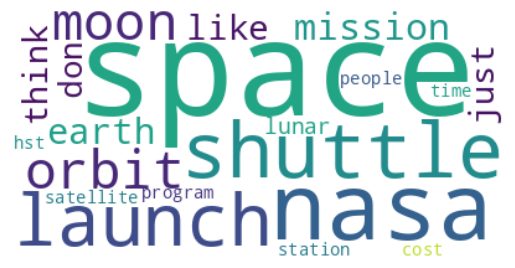

Cluster 1 : game year games team baseball hit think players win runs braves good don pitching season pitcher time better like league


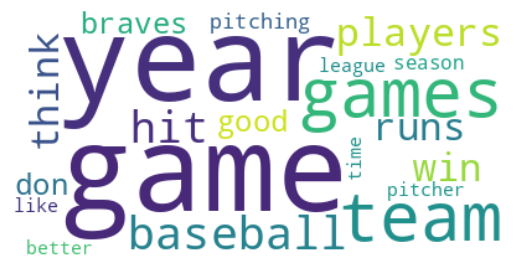

Cluster 2 : god jesus christian bible christians people christ believe kent life man did say don faith cheers religion love know christianity


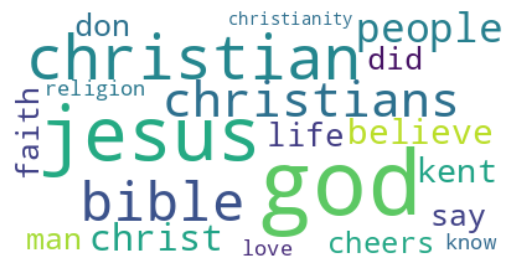

Cluster 3 : graphics thanks image file files know program format does mail gif ftp help hi looking advance software windows images use


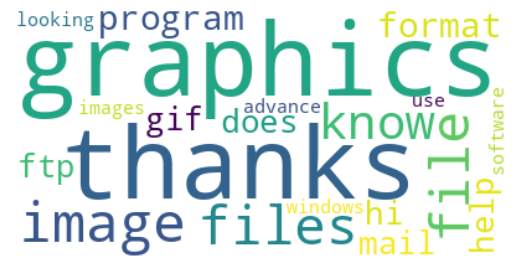

Cluster 4 : bike just like don think know ve good time does right new did people really say make got dod sure


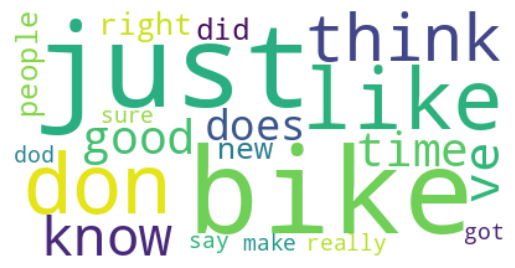

In [8]:
#YOUR CODE STARTS HERE#
showCentroids(kmeans, true_k, terms)
















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Summarize your results in 4 sentences at most.

------------YOUR TEXT STARTS HERE------------

Even if the documents matrix has a high dimensionality and we set the number of init to 20, the time is good since the matrix is sparse. After different attempts, we decided to not perform lemmatization of the text, but simply to set max_d/min_d on vectorization to improve the Adjusted Rand-Index, that using our seed, is more than 0.2. About the centroid keyboards, we can say that 4 categories out of 5 are very well represented by the corresponding centroid set of keywords. The last category probably has only one keyword that is very distinctive.

## Part 2 - keyword extraction/topic distillation using Latent Semantic Analysis
We use Truncated SVD as an alternative baseline. In this case, we use the first $k$ components (singular vectors, with $k = 5$ in our case) of the Truncated SVD as descriptions of the latent topics and we identify the terms that are the most important for each component, as seen in class. Quality will be measured as follows:
- Soundness of identified keywords: build word clouds of 20 most important keywords for each cluster
- Time efficiency

This part must run within a maximum of **15** minutes. To meet this constraint, approximations can be made (using fewer documents, reducing dictionary size). However, these approximations **must be explicitly indicated** in the code.

### 2.1
If you need to, prepare here helper functions to run your computations.

In [9]:
#YOUR CODE STARTS HERE#
# Helper class that performs the truncated SVD on the original documents / terms sparse matrix.
# The results are stored in the class fields `pipe` and `USigma` so that they can be reused by the part 3 of this colab.
# What we call here matrix V is actually V transpose.
class LSA:
    def __init__(self, X: np.array):
        # We do here truncated svd using `n_components` equals to 100,
        # reccomandanded for LSA according to the SciKit learn documentation:
        #   https://scikit-learn.org/1.5/modules/generated/sklearn.decomposition.TruncatedSVD.html.
        # On this result we take the first 5 singular components as requested.
        # The team also tried to use directly 5 as `n_components`, this seems to lead to the exact same result!
        # So we decide to set `n_components` equals 100 in order to make the job done here reusable from part (3) of the homework.
        self.pipe = make_pipeline(TruncatedSVD(n_components=100, random_state=1224), Normalizer(copy=False))
        self.USigma = self.pipe.fit_transform(X)
        print("U * Sigma", self.USigma.shape)
        Sigma = self.pipe[0].singular_values_
        print("Sigma", Sigma.shape)
        self.V = self.pipe[0].components_
        print("V", self.V.shape)

    def printMostImportantKeywords(self, m: int, columns: np.array):
        # from 100 singular values
        # we select only **m** components
        Vm = self.V[:m]
        print("V, using m components", Vm.shape)
        data = pd.DataFrame(Vm, columns=terms)
        for i in range(m):
            print("component ", i)
            positives: pd.Series = data.iloc[i].sort_values(ascending=False).head(20)
            print("most positive terms:", *list(positives.axes[0]))
            WordCloudImage(positives).show()
            negatives: pd.Series = data.iloc[i].sort_values(ascending=True).head(20)
            print("most negative terms:", *list(negatives.axes[0]))
            WordCloudImage(negatives).show()




#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

###2.2
If you need to perform further text pre-processing and/or vectorization or redo it from scratch do it here. In this case, comment your code below to explain why you are doing this. Otherwise, leave the next cell empty.

In [10]:
#YOUR CODE STARTS HERE#

# Reimporting the dataset using *shuffle=True*,
# according to our tests this improves the final adjusted random score.
dataset = fetch_20newsgroups(remove=("headers", "footers", "quotes"),
  subset="all", categories=categories, shuffle=True, random_state=1224)
labels = dataset.target
unique_labels = np.unique(labels)
true_k = unique_labels.shape[0] # number of different labels

# Redo vectorization on the reimported dataset, using different values for max_df / min_df
vectorizer = TextVectorizer(dataset, 0.3, 3)
X_tfidf = vectorizer.X_tfidf
terms: np.array = vectorizer.terms

# The team decided to not process further the matrix,
# since we want to keep the matrix very sparse (using SVD) and not using PCA.

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 2.3
Initiate time calculation for Part 2.

In [11]:
#YOUR CODE STARTS HERE#
t0 = time()






#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

###2.4
Perform Latent Semantic Analysis

In [12]:
#YOUR CODE STARTS HERE#
lsa = LSA(X_tfidf)






#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

U * Sigma (4578, 100)
Sigma (100,)
V (100, 13409)


Print Time efficiency.

In [13]:
#YOUR CODE STARTS HERE#
print("SVD time: ", time() - t0)



#YOUR CODE ENDS HERE#
#THIS IS LINE 7#

SVD time:  1.96822190284729


Print, for each cluster, wordcloud of 20 most important keyworkds.

V, using m components (5, 13409)
component  0
most positive terms: don like just know think good space time people does bike year ve thanks graphics want way say really did


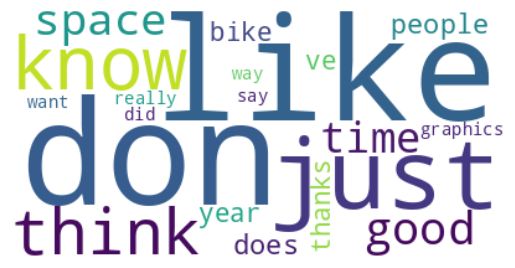

most negative terms: ppd 542 567 asdg 232 notifying ppmtogif qemm386 changefsi 240438 841099 mohammad hv12 vjpeg vesadrv2 25192 praetzel conv nutterbrink facto


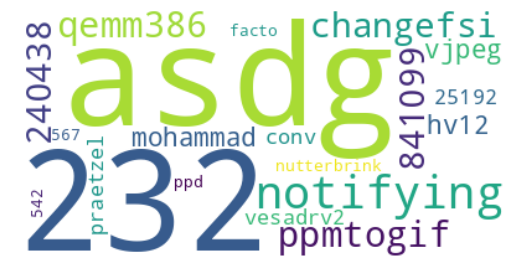

component  1
most positive terms: graphics image thanks files file format program ftp gif software images mail available advance edu color jpeg information looking windows


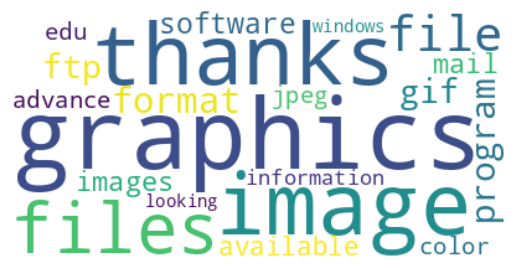

most negative terms: year game team think games god bike don hit just say did baseball win really jesus right pitching good people


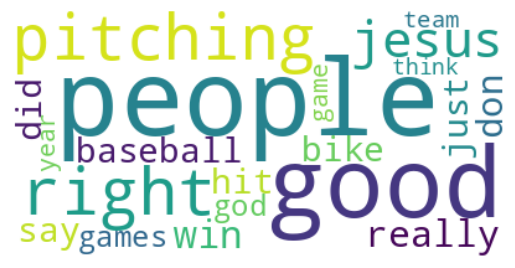

component  2
most positive terms: space god jesus nasa people bike shuttle launch orbit earth bible christian moon life mission christians just hst cost lunar


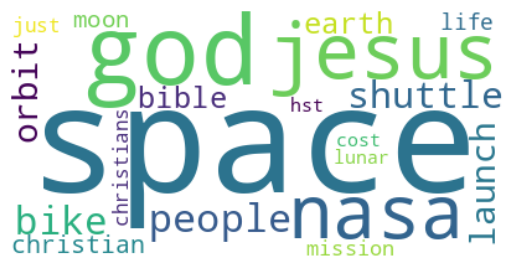

most negative terms: game team games year baseball runs win thanks hit pitching braves graphics players pitcher morris season run sox player league


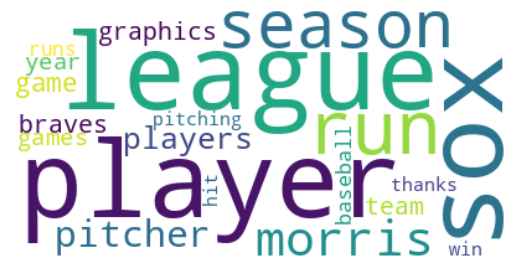

component  3
most positive terms: space nasa shuttle year launch orbit team moon mission data station earth satellite lunar game games solar spacecraft gov sci


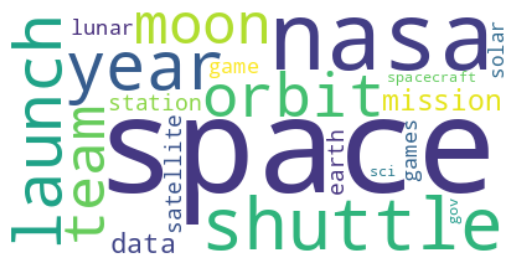

most negative terms: bike god jesus thanks know does bible christian ve ride don bikes riding just advance christians graphics say motorcycle right


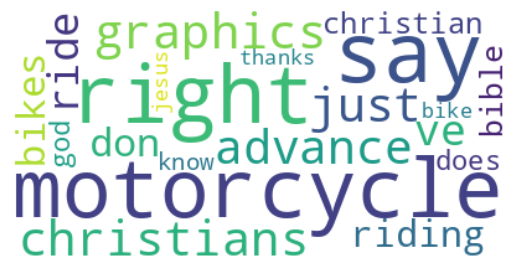

component  4
most positive terms: bike ride bikes riding dod motorcycle dog miles like just ve bmw road new honda helmet car advice rear buying


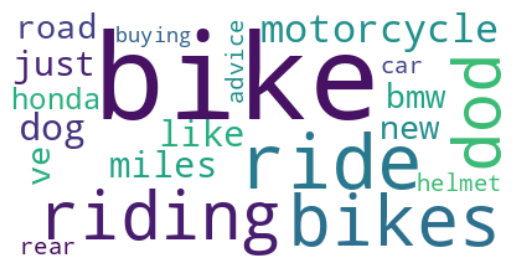

most negative terms: god jesus bible christian christians believe people christ life does say team game faith word did kent image children man


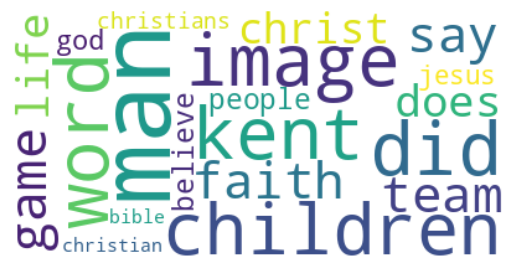

In [14]:
#YOUR CODE STARTS HERE#
lsa.printMostImportantKeywords(true_k, terms)
















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Summarize your results in 4 sentences at most.

------------YOUR TEXT STARTS HERE------------

The positive and the negative terms of the component 0 seem to not reflect any specific category, probably they are terms frequently used (positive) and terms not rarely used (negative). 4 of out 5 categories can be found in the positive terms of the components 1 to 4, while the 5-th is possible to be found in the negative terms of the same components, each time mixed with terms representative of other different categories. In general, for each of these components we can find the sum of one or more categories on its positive side and one or more different categories on its negative side. The times are similar to the k-means ones and they are not bad since we started from a very sparse matrix.

## Part 3 - keyword extraction/topic distillation using Truncated SVD + $k$-means
In this case, we i) first embed documents, i.e., project them onto the space spanned by the first $m$ singular vectors (for a suitable choice of $m$, see further) and then ii) we cluster the $m$-dimensional vectors thus obtained using $k$-means as before. Quality will be measured as follows:
- Clustering quality with respect to true labels: Adjusted Rand Index (see scikit-learn documentation about)
- Soundness of identified keywords: build word clouds of 20 most important keywords for each cluster
- Time efficiency

To determine the number $m$ of singular components to keep, use the elbow method to identify a first tentative value and then the adjusted Rand Index to find the right value. For example, if you plot total explained variance for $m$ ranging from $1$ to $100$ (or perhaps even 50), you are likely to see a clear elbow. Assume you identify 30 as a tentative value. To find the best choice for $m$, you can compute the adjusted Rand index of the corresponding clustering for all values of $m$ in a neighbourhood of $30$ (e.g., in the range $\{25,\ldots , 35\}$) and pick the value for which the index is maximum. This is just a simple heuristic, given to you as an example. If you think you found a better one you are free to use it, but you should briefly explain how it works. You are encouraged to use more principled heuristics proposed in the literature to choose $m$, in which case you should provide references about.

This part must run within a maximum of **20** minutes. To meet this constraint, approximations can be made (using fewer documents, reducing dictionary size). However, these approximations **must be explicitly indicated** in the code.

### 3.1
If you need to, prepare here helper functions to run your computations.

In [15]:
#YOUR CODE STARTS HERE#
# Utility class in which we start from the LSA instance computed in the part (2) of the colab.
# We select each time a different number of singular values (from 4 to 13),
# in order to find the optimal in this random setting for maximaze the adjusted_rand_score.
class LatentSemanticAnalysis:
    def __init__(self, lsa: LSA, true_k: int, labels, X):
        USigma = lsa.USigma
        Sigma = lsa.pipe[0].singular_values_
        V = lsa.pipe[0].components_

        plt.plot(Sigma)
        plt.title('Singular values')
        plt.show()

        # According to plot we have a elbow of a curve approx around m=9
        BASE_M = 4
        bestARI = 0
        bestX = None
        for i in range(10):
            m = BASE_M + i
            # Redo the TruncatedSVD + normalization for each m
            # produces in general better ARIs compared with reusing the USigma / V
            # for 100 components and select algebraically m each time.
            # This was our last discovery!
            svd = TruncatedSVD(n_components=m, random_state=1224)
            normalizer = Normalizer(copy=False)
            lsa = make_pipeline(svd, normalizer)
            X_reduced = lsa.fit_transform(X)
            Vi = lsa[0].components_
            Xi = (X_reduced).dot(Vi)
            kmeans = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, random_state=1224)
            kmeans.fit(Xi)
            ari = metrics.adjusted_rand_score(labels, kmeans.labels_)
            print("m components ", m, " - ARI ", ari)
            if (ari > bestARI):
                bestARI = ari
                bestX = Xi
        self.X = bestX
#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

###3.2
If you need to perform further text pre-processing and/or vectorization or redo it from scratch do it here. In this case, comment your code below to explain why you are doing this. Otherwise, leave the next cell empty.

In [16]:
#YOUR CODE STARTS HERE#

















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 3.3
Initiate time calculation for Part 3.

In [17]:
#YOUR CODE STARTS HERE#
t0 = time()






#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

###3.4
Perform Truncated SVD and identify your best choice for the number $m$ of components to keep. Briefly explain the strategy you adopt to find $m$, using at most 5 lines in the text cell below. If you are simply following the heuristic I suggested above (which I did not test but might do a decent job), please just briefly state this.

------------YOUR TEXT STARTS HERE------------

The time constraint (max 20 minutes) allows us to compute the 10 k-means we need, each time choosing a different m (singular values to keep). We can also safely decrease the n_init of each k-means, since the dimension of the vectorized space is reduced and this makes k-means more stable. For each k-means we compute the ARI and finally we choose m that maximizes the ARI, as suggested. The last day we discovered that performing also n normalized truncated SVDs, before each differnt k-means, produces even better ARIs, so we also added this very last change.

Next, write your code to identify the best value of $m$.

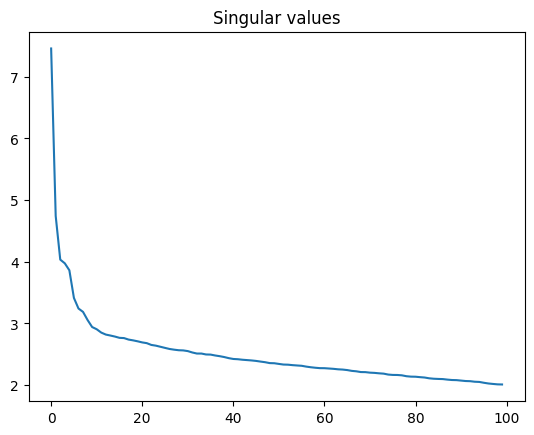

m components  4  - ARI  0.4414049437074285
m components  5  - ARI  0.5563086150948604
m components  6  - ARI  0.5519593798287706
m components  7  - ARI  0.37782048756292164
m components  8  - ARI  0.46120659011506626
m components  9  - ARI  0.47942034025327945
m components  10  - ARI  0.45522837652105147
m components  11  - ARI  0.45101012139802077
m components  12  - ARI  0.44144153426312627
m components  13  - ARI  0.47787503194164954


In [18]:
#YOUR CODE STARTS HERE#
lsa = LatentSemanticAnalysis(lsa, true_k, labels, X_tfidf)





























#YOUR CODE ENDS HERE#
#THIS IS LINE 33#

###3.5
Perform Truncated SVD (again if you did not save the results of the previous computation) with the number $m$ of components identified above. Cluster the projections of the documents onto the first $m$ components using $k$-means ($k = 5$ in our case).

In [19]:
#YOUR CODE STARTS HERE#
print("shape of the data: ", lsa.X.shape)
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=5, random_state=1224
)
kmeans.fit(lsa.X)










#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

shape of the data:  (4578, 13409)


KMeans(max_iter=100, n_clusters=5, n_init=5, random_state=1224)

Print Time efficiency.

In [20]:
#YOUR CODE STARTS HERE#
print("LSA time: ", time() - t0)
print("adjusted random score: ", metrics.adjusted_rand_score(labels, kmeans.labels_))


#YOUR CODE ENDS HERE#
#THIS IS LINE 7#

LSA time:  86.80526328086853
adjusted random score:  0.5653044254108639


Print, for each cluster, wordcloud of 20 most important keyworkds.

Cluster 0 : bike just like don know ve ride think good time bikes really riding right dod got want new going thanks


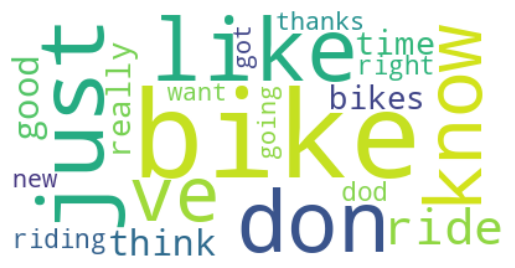

Cluster 1 : graphics thanks image know files file format program does gif ftp mail like edu software looking advance help images need


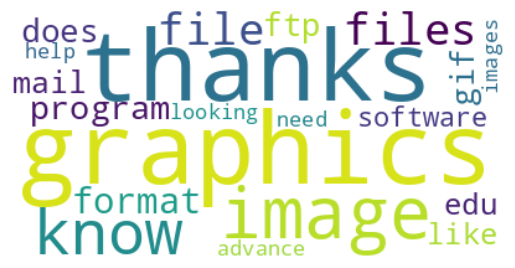

Cluster 2 : game year team games baseball think don hit runs good win time pitching players just better like braves season pitcher


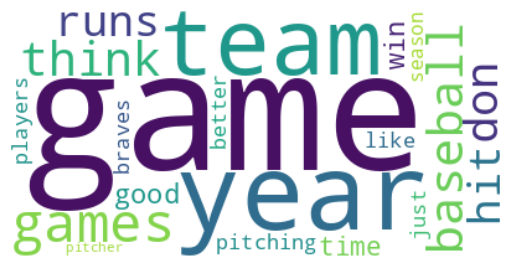

Cluster 3 : space nasa shuttle like just launch think don orbit people time moon earth data new mission program use cost long


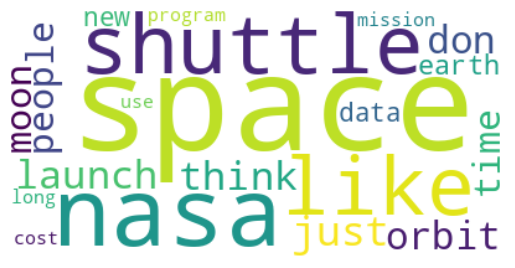

Cluster 4 : god jesus don people think just know like say bible christian does did good believe right life time way ve


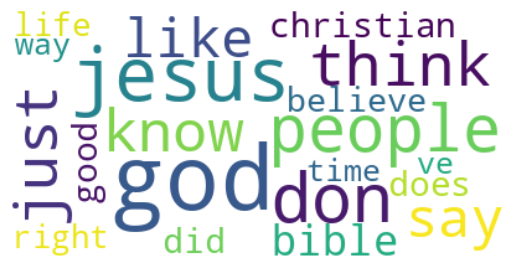

In [21]:
#YOUR CODE STARTS HERE#
showCentroids(kmeans, true_k, terms)
















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Summarize your results in 4 sentences at most.

------------YOUR TEXT STARTS HERE------------

In our random state, the ARI reached the remarkable value of 0.56 using m = 5, even if every other value of m was giving an ARI strictly greater than the one given by the pure k-means (part 1), considering also that the n_init is just 5 and not 20 anymore. About the word clouds we can say that we obtained very neat results: all the categories are very well identified by the keywords of the centroids. The time of the entire LSA procedure, in particular the time to find an optimal value of m, looks quite long if compared with the times of the other sections. Knowing m in advance or maybe using different tecquiques to choose m could probably improve the time required by the analysis.
